# Quick Numpy and Jupyter Tutorial

A few tools that might help you as you complete the first homework. First, download and install conda at https://docs.anaconda.com/anaconda/install/index.html. If the installation went correctly, then running `which conda` should give you the path to the location of conda binary. You don't really need this but will make life easier so I would recommend it. Sorry, all instructions are for Linux based systems which is what I know. Next, let's set everything up:

## Creating a notebook
* If you're on a remote server like me start a ssh session with tunneling `ssh -L 8889:localhost:8889 <username>@<server address>`
* Create a directory for your notebooks somewhere `cd && mkdir cv-intro-tutorial && cd cv-intro-tutorial`
* Create conda environment `conda create --name intro-cv --yes`
* Activate the environment `conda activate intro-cv`
* Install packages in the environment `conda install --yes scikit-image numpy jupyter matplotlib`
* You can check which version of packages was installed with `conda list | grep python`
* Run the jupyter notebook server `jupyter notebook --port 8889 --no-browser`
* Copy the the url from the terminal into a browser and you should have jupyter running
* Create a new notebook and name it

## Skip the above steps and just use Google Colab

## Working with a notebook
* Type the obligatory `print('Hello World!')` in the cell and hit `[CTRL]+[RETURN]`
* A jupyter notebook is a collection of cells aka small chunks of code
* Keyboard shortcuts in the menu and help
    * Move around with h,j,k and l keys (similar to vim)
    * Change from editing a cell to navigating the cells with the escape key
    * Run notebooks with
        * `[SHIFT]+[RETURN]` run current and create a new cell below
        * `[CTRL]+[RETURN]` run the current cell
    * Cell management commands below
        * If you're in the edit mode, then press `[ESC]` to get out of it
        * Create a new cell above `[A]` (not the capital A letter just plain `a` key)
        * Create a new cell below `[B]`
        * Cut the current cell `[X]`
        * Paste below the current cell `[V]`
        * Paste above the current cell `[SHIFT]+[V]`
* Frequently save and checkpoint your notebooks with `[META]+[S]` (just press the `s` key)
    * I have been burned several times by not doing this
* You can run terminal commands by prefixing them with `!`
* Jupyter notebook skills will be handy if you're dealing with Google Colab

In [22]:
!pwd && echo 'Hello World!'

/home/ajinkya/cv-intro-tutorial
Hello World!


## Let's do some CV stuff

First, let's import the packages

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import skimage

Let's look at an image. Matplotlib API is horrible in my opinion since it has a thousand ways of doing a single thing, so just stick to one thing that works well for you. You can go to your previous page in the browser and click on the image to view it in the browser.

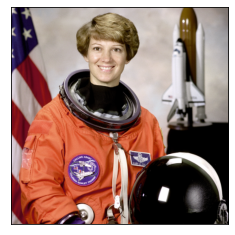

In [18]:
fig, ax = plt.subplots()
ax.imshow(skimage.data.astronaut())
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.show()
fig.savefig('astronaut.jpg')

Alternatively, in a pinch, you can also do.

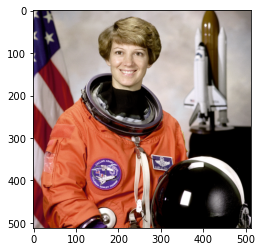

In [19]:
plt.imshow(skimage.data.astronaut())

Let's see how to load and save an image

In [35]:
im = skimage.data.astronaut()
skimage.io.imsave('astronaut-1.jpg', im)
im = skimage.io.imread('astronaut-1.jpg')

An image is just an array of unsigned integers that denotes RGB pixel values

In [128]:
print(type(im), im.shape, im.max(), im.min())
print(im[0])

<class 'numpy.ndarray'> (426, 640, 3) 255 0
[[240 239 219]
 [240 239 219]
 [240 239 219]
 ...
 [228 227 197]
 [228 227 196]
 [227 226 195]]


In [40]:
im = skimage.io.imread('puppy.jpg')

In [127]:
type(im), im.shape, im.max(), im.min()
print(im[0])

[[240 239 219]
 [240 239 219]
 [240 239 219]
 ...
 [228 227 197]
 [228 227 196]
 [227 226 195]]


You can do all sorts of matrix and vector arithmetic with Numpy arrays

In [44]:
a = np.arange(4)
b = np.ones(4)
c = np.zeros(4) + 2
x = a + b + c
y = a - b + c
z = a * b + c
u = a / b - c
print(x, y, z, u)

[3. 4. 5. 6.] [1. 2. 3. 4.] [2. 3. 4. 5.] [-2. -1.  0.  1.]


Get some help on a function with the `?` suffix

In [49]:
np.arange?

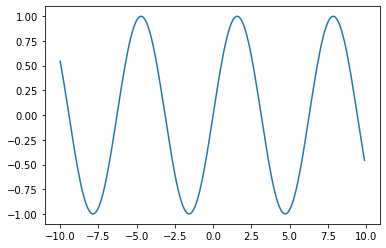

In [71]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, np.sin(x))

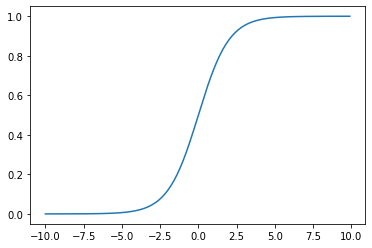

In [72]:
plt.plot(x, np.exp(x)/(np.exp(x) + 1))

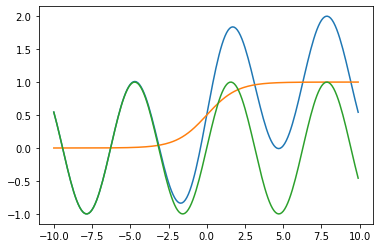

In [74]:
plt.plot(x, np.sin(x) + np.exp(x)/(np.exp(x) + 1))
plt.plot(x, np.exp(x)/(np.exp(x) + 1))
plt.plot(x, np.sin(x))

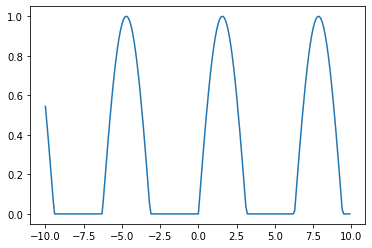

In [79]:
y = np.sin(x)
y[y < 0] = 0
plt.plot(x, y)

0.9999232575641012 -0.9999232575641003


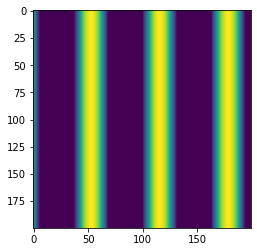

In [87]:
im_y_1 = np.vstack([np.sin(x)]*200)
im_y_2 = np.vstack([y]*200)
plt.imshow(im_y_2)
print(im_y.max(), im_y.min())

In [88]:
skimage.io.imsave('sin-image-1.jpg', im_y_1)
skimage.io.imsave('sin-image-2.jpg', im_y_2)

Lossy conversion from float64 to uint8. Range [-0.9999232575641003, 0.9999232575641012]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [92]:
skimage.io.imsave('sin-image-2-fixed.jpg', np.clip(im_y_2, a_min=0, a_max=1)*255)

Lossy conversion from float64 to uint8. Range [0.0, 254.9804306788458]. Convert image to uint8 prior to saving to suppress this warning.


In [94]:
skimage.io.imsave('sin-image-2-fixed-fixed.jpg', (np.clip(im_y_2, a_min=0, a_max=1)*255).astype('uint8'))

Remember that images are unsigned integers but whenever you need to process them (e.g. apply a blur filter) you need to convert the images into float data type and preferably in the range 0 to 1. Always remember this to and fro conversion between float and integer. See another example below.

We want to brighten up the puppy image.

How do we do that?

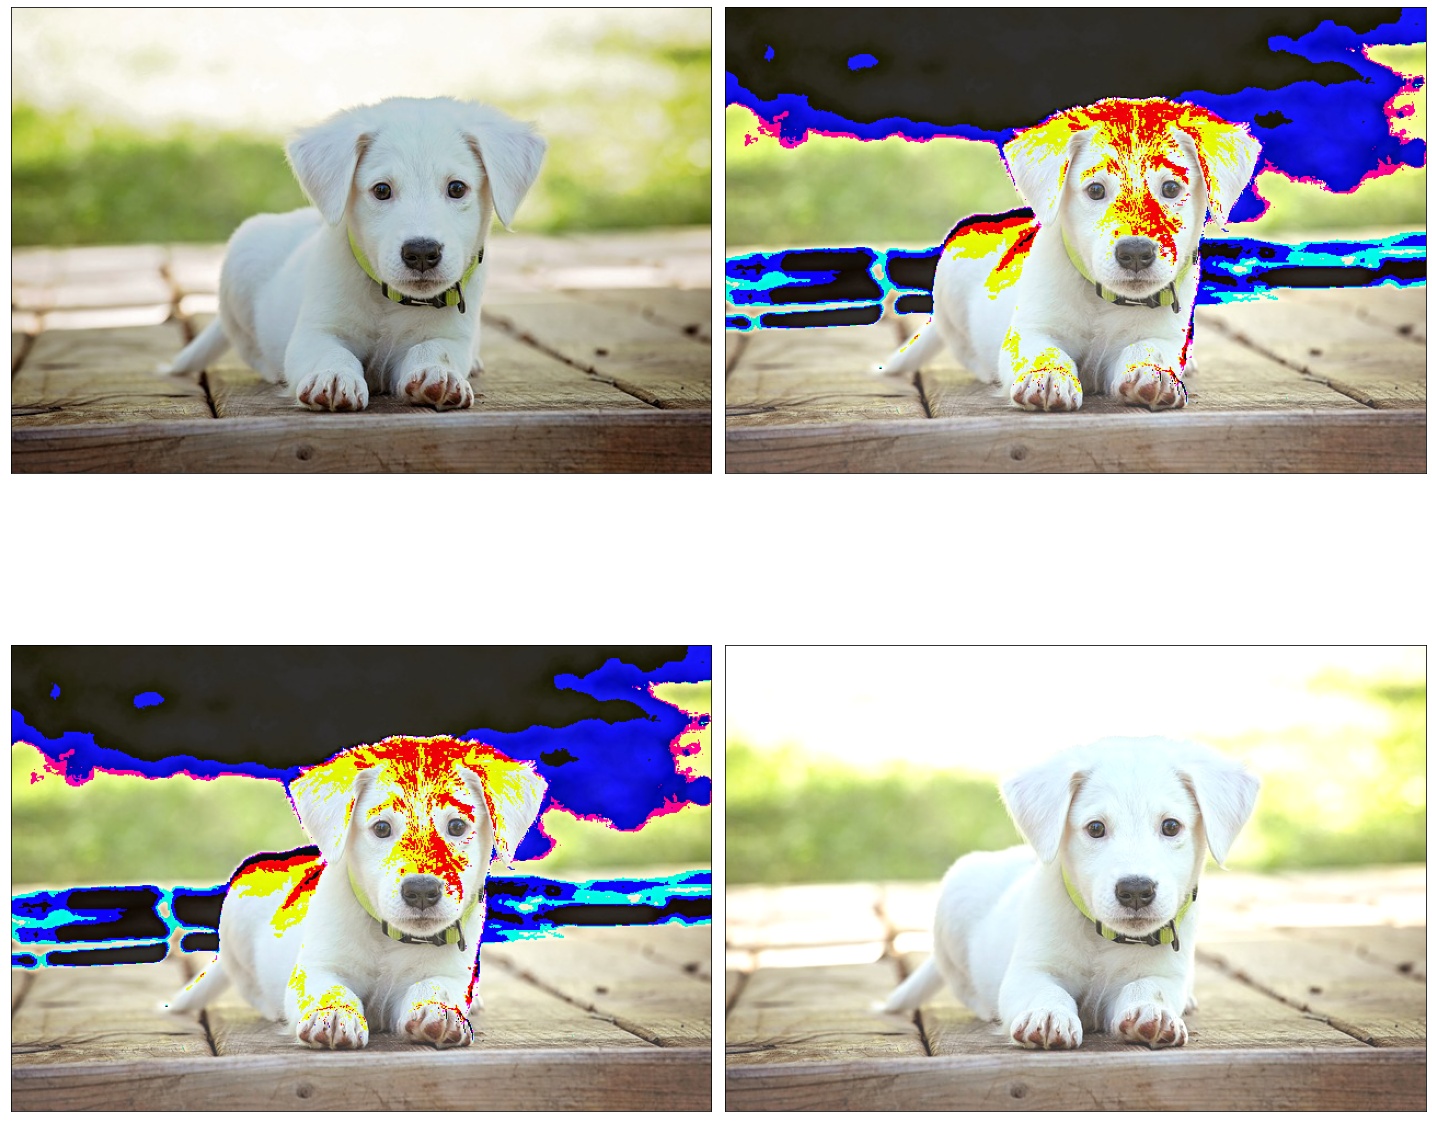

In [110]:
fig, axes = plt.subplots(2,2, figsize=(20, 20))
axes[0][0].imshow(im)
axes[0][1].imshow(im+50)
axes[1][0].imshow(np.clip(im+50, 0, 255))
axes[1][1].imshow(np.clip(im.astype('float')+50, 0, 255).astype('uint8'))
for ax in axes.flatten():
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
plt.tight_layout()

Let's convert this image to grayscale. Note that the mean operation coverts the image to float by default and averaging the RGB pixels ensures that we don't have an overflow beyond. Keeping track of data types and array shapes is a great way of debugging your algorithms.

uint8 float64 0.0 254.33333333333334


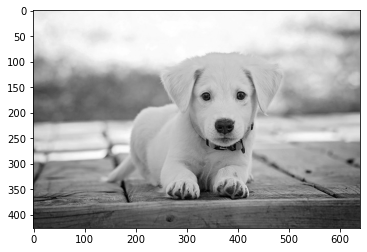

In [121]:
im_gray = im.mean(axis=-1)
print(im.dtype, im_gray.dtype, im_gray.min(), im_gray.max())
plt.imshow(im_gray, cmap='gray')

Note that matplotlib will convert your float image to uint which might nullify some of your operations. Again, for all these reasons to and fro conversion between an array to be displayed and an array to be processed has to be carefully chosen.

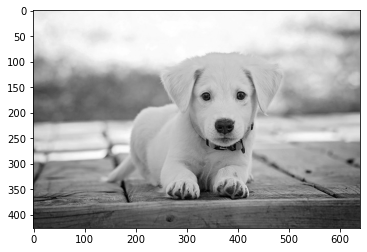

In [126]:
plt.imshow(20*im_gray, cmap='gray')

In [130]:
im_gray.shape, im_gray.T.shape

((426, 640), (640, 426))

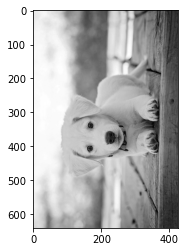

In [132]:
plt.imshow(im_gray.T, cmap='gray')

40000


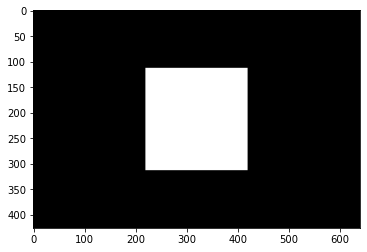

In [149]:
mask = np.zeros_like(im_gray)
mid_x, mid_y = np.array(mask.shape)//2
mask[mid_x-100:mid_x+100, mid_y-100:mid_y+100] = 1
print(np.count_nonzero(mask))
plt.imshow(mask, cmap='gray')

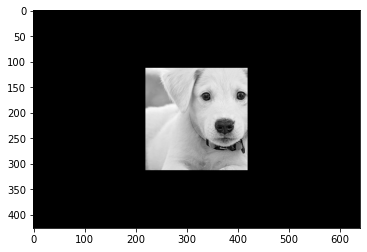

In [150]:
im_gray_crop = mask * im_gray
plt.imshow(im_gray_crop, cmap='gray')

## Broadcasting

In [171]:
im_crop = mask * im
plt.imshow(im_crop)

ValueError: operands could not be broadcast together with shapes (426,640) (426,640,3) 

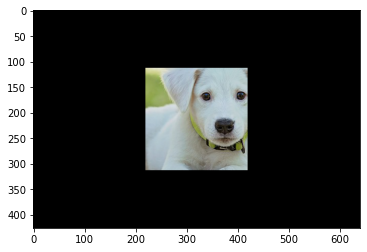

In [172]:
im_crop = mask.reshape((*mask.shape, 1)) * im
plt.imshow(im_crop.astype('uint8'))

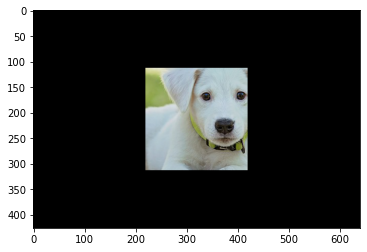

In [173]:
im_crop = mask * im.transpose((2, 0, 1))
plt.imshow(im_crop.astype('uint8').transpose((1, 2, 0)))

In [194]:
x = np.ones((5, 5))
y = np.random.randint(0, 2, size=(5,))
print(x)
print(y)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[0 1 0 1 0]


In [195]:
print(x + y)

[[1. 2. 1. 2. 1.]
 [1. 2. 1. 2. 1.]
 [1. 2. 1. 2. 1.]
 [1. 2. 1. 2. 1.]
 [1. 2. 1. 2. 1.]]


In [209]:
print(x.shape, y.shape)
print(x + y)
print()
print(x.shape, y.reshape(5, 1).shape)
print(x + y.reshape(5, 1))
print()
print(x.shape, y.reshape(1, 5).shape)
print(x + y.reshape(1, 5))

(5, 5) (5,)
[[1. 2. 1. 2. 1.]
 [1. 2. 1. 2. 1.]
 [1. 2. 1. 2. 1.]
 [1. 2. 1. 2. 1.]
 [1. 2. 1. 2. 1.]]

(5, 5) (5, 1)
[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1.]]

(5, 5) (1, 5)
[[1. 2. 1. 2. 1.]
 [1. 2. 1. 2. 1.]
 [1. 2. 1. 2. 1.]
 [1. 2. 1. 2. 1.]
 [1. 2. 1. 2. 1.]]


## Slicing

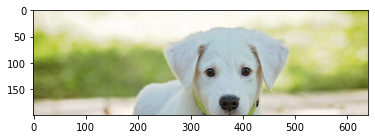

In [210]:
plt.imshow(im[50:250])

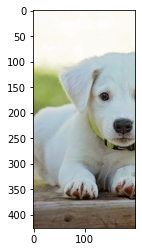

In [214]:
plt.imshow(im[:, 200:400])

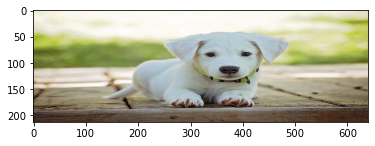

In [217]:
plt.imshow(im[::2])

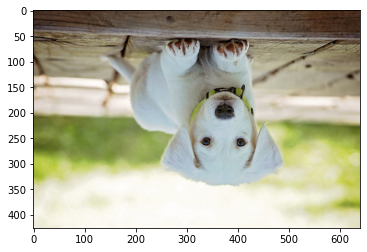

In [218]:
plt.imshow(im[::-1])

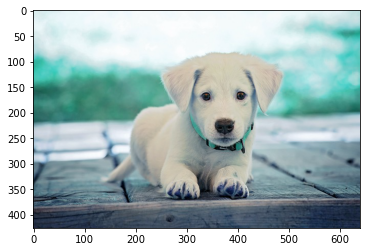

In [219]:
plt.imshow(im[:, :, ::-1])

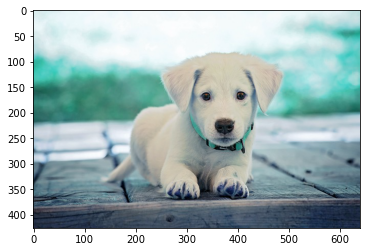

In [220]:
plt.imshow(im[:, :, (2, 1, 0)])

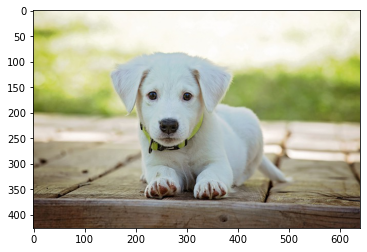

In [230]:
plt.imshow(im[:, -1*np.arange(im.shape[1]), :])

Replaces channels red with blue and green with red and sets the blue channel to zero.

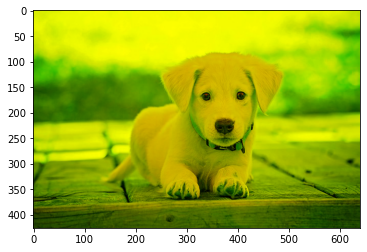

In [248]:
im_swap = np.zeros_like(im)
im_swap[:, :, (0, 1)] = im[:, :, (2, 0)]
plt.imshow(im_swap)